# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [88]:
%matplotlib inline

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [89]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [90]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Will\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


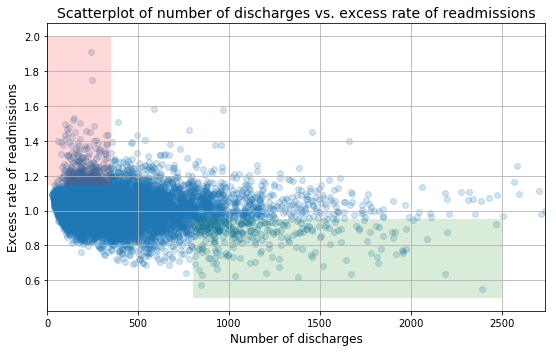

In [91]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

A.  I do not necessarily agree with the recommendation.  The statistical analysis summarized in the report gives no indication that anything was done other than to average up the readmission rates for two relatively arbitrary groupings and to report excess readmission rates for the groups.  Based on the preliminary report, I know nothing of sample sizes or level of confidence that the differences reflect anything other than sample size effects.  The diagram shown doesn't indicate a lot of clear overall correllation between size and excess readmission rates, and the simple numerical correllation is not extremely strong as shown below (though it is negative as the analysis suggests).

The recommendations also don't follow from the statistics cited.  The numbers are for a grouping of hospitals with under 100 discharges, while the recommendation affects those with under 300 discharges, with no supporting statistics given for the threshold recommended.  At a miniumum, the statistics should match the recommendations.

Something more should be required before suggesting hospitals should consolidate, which is likely to have other negative effects on heath care delivery, particularly in rural and other underserved areas.

In [92]:
df = clean_hospital_read_df[["Number of Discharges","Excess Readmission Ratio"]]
df = df[81:-3]
df.corr('pearson')

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.093096
Excess Readmission Ratio,-0.093096,1.000000


B.  I would first hypothesis test the prelimary reports findings.  First, the percentages of each group with penalizable excess readmission rates cited in the statistics section of the report.

p1: pct of readmission rate > 1 in group 1 (hospitals with < 100 discharges)
p2: pct of readmission rate > 1 in group 2 (hostitals with > 1000 discharges)

H0: p1=p2
HA: p1>p2
99% confidence level

In [93]:
n1 = len(df[df["Number of Discharges"] <100])
n2 = len(df[df["Number of Discharges"] >1000])
p1 = len(df[(df["Number of Discharges"] <100) & (df["Excess Readmission Ratio"] > 1.0)])/n1
p2 = len(df[(df["Number of Discharges"] >1000) & (df["Excess Readmission Ratio"] > 1.0)])/n2
p = (p1*n1+p2*n2)/(n1+n2)
std = (p*(1-p))**0.5

t = (p1-p2)/(std*(1/n1+1/n2)**0.5)

print("p1: " + str(p1))
print("p2: " + str(p2))
print("n1: " + str(n1))
print("n2: " + str(n2))
print("std: " + str(std))
print("test statistic: " + str(t))

p1: 0.6321548821548821
p2: 0.44565217391304346
n1: 1188
n2: 460
std: 0.49354276065348013
test statistic: 6.88127460405276


While I note that I did not reproduce the exact percentage for p1 that the report did (59% vs 63%), the test I conducted suggests that there is a problem with smaller hospitals that may need correction (2.575 is the critical value for 99% confidence).  Since the report's recommendation shifts the threshold from 100 to 300, I repeated the test with a 300 discharge threshold.

In [94]:
n1 = len(df[df["Number of Discharges"] <300])
n2 = len(df[df["Number of Discharges"] >1000])
p1 = len(df[(df["Number of Discharges"] <300) & (df["Excess Readmission Ratio"] > 1.0)])/n1
p2 = len(df[(df["Number of Discharges"] >1000) & (df["Excess Readmission Ratio"] > 1.0)])/n2
p = (p1*n1+p2*n2)/(n1+n2)
std = (p*(1-p))**0.5

t = (p1-p2)/(std*(1/n1+1/n2)**0.5)

print("p1: " + str(p1))
print("p2: " + str(p2))
print("n1: " + str(n1))
print("n2: " + str(n2))
print("std: " + str(std))
print("test statistic: " + str(t))

p1: 0.5374918140144074
p2: 0.44565217391304346
n1: 6108
n2: 460
std: 0.49903436361887354
test statistic: 3.8063750576434097


The report's recommendation agrees with the data, since the test statistic still shows a difference between the groupings at 99% confidence, even if the report should be rewritten so the recommendations match the statistics cited.  However I believe we should still be more precise about the effect we are seeing.  We are running a simple two variable comparison, and it is straightforward to determine where the mean excess readmission rate falls below the threshold of interest of 1 by doing a simple linear regression.

In [99]:
df["Const"] = 1
regression = sm.OLS(df["Excess Readmission Ratio"], df[["Number of Discharges", "Const"]]).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Excess Readmission Ratio   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                  0.009
Method:                       Least Squares   F-statistic:                     100.5
Date:                      Sat, 27 May 2017   Prob (F-statistic):           1.50e-23
Time:                              21:27:32   Log-Likelihood:                 11177.
No. Observations:                     11494   AIC:                        -2.235e+04
Df Residuals:                         11492   BIC:                        -2.233e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Number of Discharges -2.857e-05   2.85e-06    -10.023      0.000     -3.42e-05  -2.3e-05
Const                    1.0179      0.001    757.349      0.000         1.015     1.021
==============================================================================
Omnibus:                     1666.001   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6855.329
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       6.538   Cond. No.                         743.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a statistically significant negative relationship between the excess readmission rate and the number of discharges the hospital processed.  However, the coefficient of around -.00002 suggests a practically insignificant relationship.  In addition, there is significant variation in the sample aside from hospital size (note the extremely small R-squared, indicating Number of Discharges explains very little of the variation in Excess Readmission Rates). 

As I stated, we can precisely determine at what point the mean excess readmission rate crosses the finiancially critical value of 1.0.  Since [Excess Readmission Rate] = -.00002857 * [Number of Discharges] + 1.0179, the threshold can be calculated as below:

In [96]:
(1-1.0179)/-.00002857

626.5313265663293

This suggests our recommendations for improvement should apply to hospitals with less than about 627 readmissions. However, this is a vast majority of the hospitals in the sample:

In [97]:
print("Number of Hospitals with Discharges >= 627: " + str(len(df[df["Number of Discharges"]>=627])))
print("Number of Hospitals with Discharges < 627: " + str(len(df[df["Number of Discharges"]<627])))

Number of Hospitals with Discharges >= 627: 1609
Number of Hospitals with Discharges < 627: 9885


The report's recommendation to encourage consolidation seems particularly misguided in light of these numbers.  The problem is system-wide and while larger hospitals have, on average, fewer excess readmissions, it is not practical to consolidate our way out of the issue.

Aside from that, the report's recommendation to look at resourcing issues for smaller hospitals seems reasonably sound.  However, I would recommend instead of looking at this broad (and very slight) correllation between hospital size and excess readmission rate, and analysis be done on the operational aspects of hospitals that have consistently low excess readmission rates and try to determine whether there are best practices that can be followed to avoid needlessly discharging patients who still require care and will be readmitted.

The figure is misleading because it does not describe any actual relationship in the data and just displays boxes around groups of data that the report writer decided were representative.  A scatter plot is an OK representation of the data, but the trend should be clearly identified and be based on an actual regression.

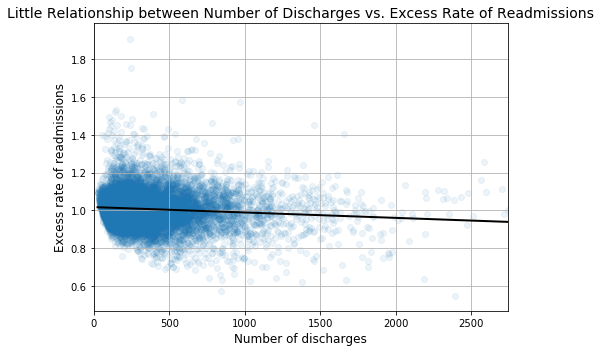

In [98]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.08)
z = -0.0000285*df["Number of Discharges"]+ 1.0179

ax.plot(x,z, linewidth=2.0, color='black')
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Little Relationship between Number of Discharges vs. Excess Rate of Readmissions', fontsize=14)
ax.grid(True)
fig.tight_layout()